<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Clone Library**

In [1]:
!git clone https://github.com/pharringtonp19/business-analytics.git

fatal: destination path 'business-analytics' already exists and is not an empty directory.


### **Import Packages**

In [2]:
import jax
import jax.numpy as jnp
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import statsmodels.formula.api as smf

### **Read In Data Set**

In [3]:
df = pd.read_csv('/content/business-analytics/datasets/cps_00007.csv.gz', compression="gzip")

FileNotFoundError: [Errno 2] No such file or directory: '/content/business-analytics/datasets/cps_00007.csv.gz'

### **Plot**

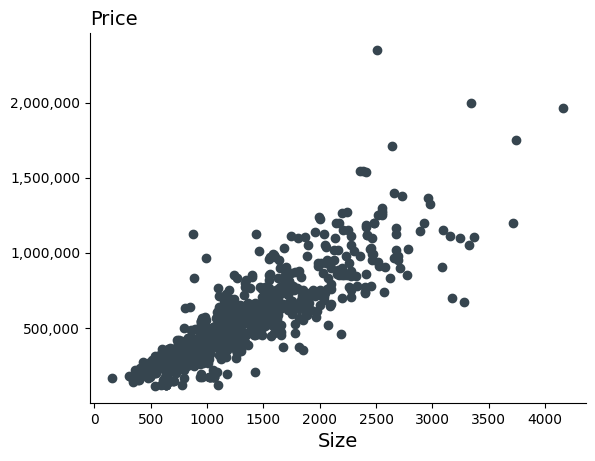

In [13]:
plt.scatter(df['size'], df['price'], color="#36454F")
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Price', size=14, loc='left')
plt.show()

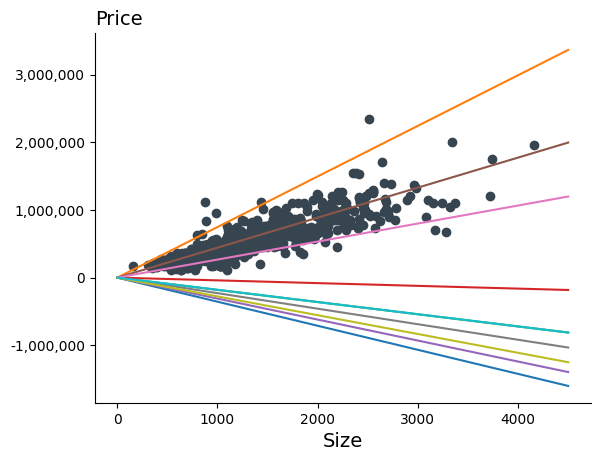

In [20]:
def affine_f(x, params):
  return params[0] + x*params[1]

def random_line(key):
  xs = jnp.linspace(0, 4500, 10)
  params = jax.random.normal(key, shape=(2,))*500
  ys = affine_f(xs, params)
  return xs, ys


plt.scatter(df['size'], df['price'], color="#36454F")

key = jax.random.PRNGKey(0)
for i in range(10):
  key, _ = jax.random.split(key)
  plt.plot(*random_line(key))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Price', size=14, loc='left')
plt.show()

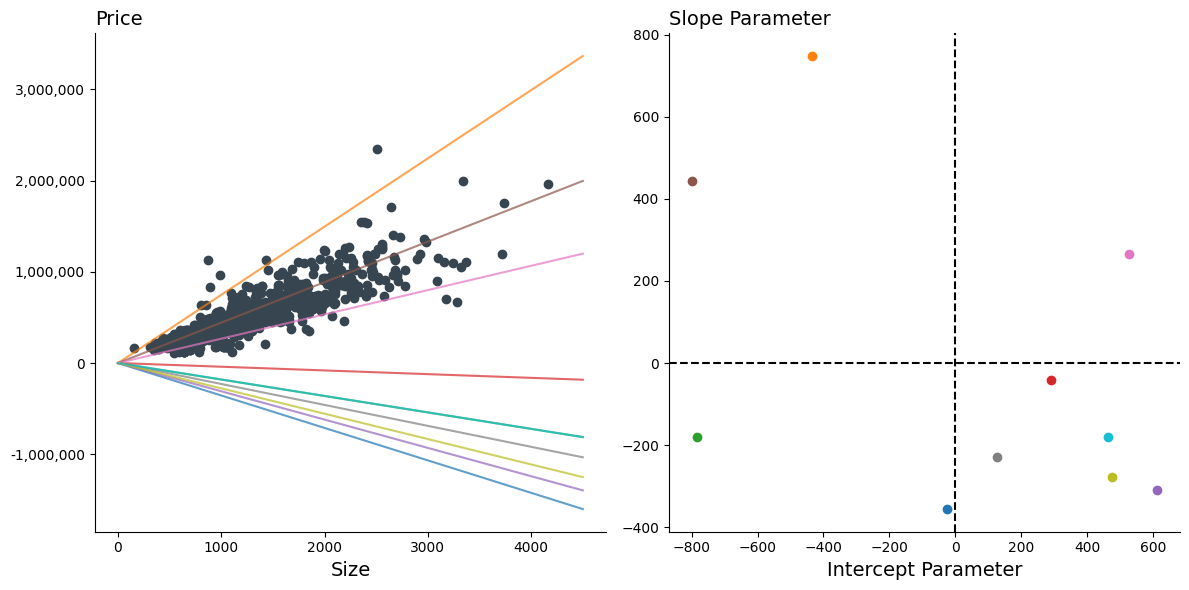

In [30]:
def affine_f(x, params):
    return params[0] + x * params[1]

def random_line(key):
    xs = jnp.linspace(0, 4500, 10)
    params = jax.random.normal(key, shape=(2,)) * 500
    ys = affine_f(xs, params)
    return xs, ys, params

# Generate main plot and parameter space subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot of size vs. price
ax1.scatter(df['size'], df['price'], color="#36454F")
key = jax.random.PRNGKey(0)

params_list = []
for i in range(10):
    key, _ = jax.random.split(key)
    xs, ys, params = random_line(key)
    ax1.plot(xs, ys, alpha=0.7)
    params_list.append(params)


ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax1.set_xlabel('Size', size=14)
ax1.set_title('Price', size=14, loc='left')


for p in params_list:
  plt.scatter(p[0], p[1])
ax2.set_xlabel('Intercept Parameter', size=14)
ax2.set_title('Slope Parameter', size=14, loc='left')
ax2.axhline(0, linestyle='--', color='black')
ax2.axvline(0, linestyle='--', color='black')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

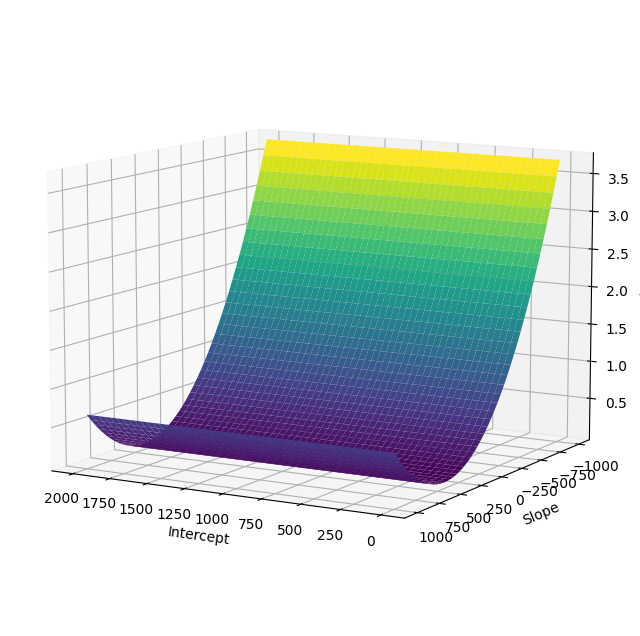

In [48]:
# Define the functions
def affine_f(x, params):
    return params[0] + x * params[1]

# Define a mean squared error loss function
def loss_function(params, xs, ys_true):
    ys_pred = affine_f(xs, params)
    return jnp.mean((ys_true - ys_pred) ** 2)

# Create data points from your dataset
xs = jnp.array(df['size'].values)
ys_true = jnp.array(df['price'].values)

# Define parameter ranges and create a grid
intercepts = jnp.linspace(0, 2000, 50)
slopes = jnp.linspace(-1000, 1000, 50)
intercepts_grid, slopes_grid = jnp.meshgrid(intercepts, slopes)

# Vectorize the loss computation over the grid
params_grid = jnp.stack([intercepts_grid.ravel(), slopes_grid.ravel()], axis=-1)
loss_values = jax.vmap(lambda params: loss_function(params, xs, ys_true))(params_grid)
loss_values = loss_values.reshape(intercepts_grid.shape)

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(intercepts_grid, slopes_grid, loss_values, cmap='viridis', edgecolor='none')

# Customize the plot
ax.set_xlabel("Intercept")
ax.set_ylabel("Slope")
ax.set_zlabel("Loss (MSE)")
ax.view_init(elev=10, azim=120)  # Adjust these values as needed

plt.show()

In [49]:
eqn = smf.ols('price ~ size', data = df)
results = eqn.fit()
results.params

,0
Intercept,12934.124023
size,407.451333


### **Fitted Values**

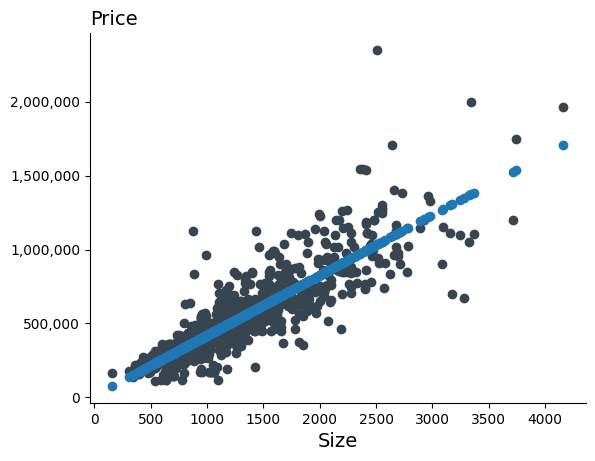

In [55]:
plt.scatter(df['size'], df['price'], color="#36454F")
plt.scatter(df['size'], results.fittedvalues)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.set_xlabel('Size', size=14)
ax.set_title('Price', size=14, loc='left')
plt.show()


### **Residuals**

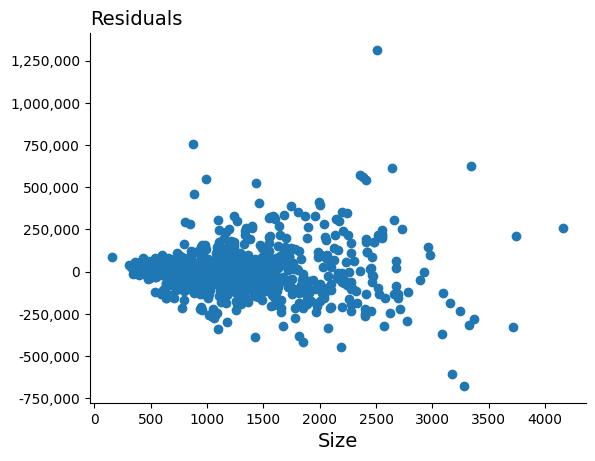

In [57]:
plt.scatter(df['size'], results.resid)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.set_xlabel('Size', size=14)
ax.set_title('Residuals', size=14, loc='left')
plt.show()

In [58]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     3232.
Date:                Sun, 27 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:05:03   Log-Likelihood:                -14329.
No. Observations:                1085   AIC:                         2.866e+04
Df Residuals:                    1083   BIC:                         2.867e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.293e+04   9705.712      1.333      0.183   -6110.006     3.2e+04
size         407.4513      7.167     56.854      0.000     393.389     421.513
==============================================================================
Omnibus:                      456.223   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8271.768
Skew:                           1.463   Prob(JB):                         0.00
Kurtosis:                      16.206   Cond. No.                     3.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""